In [ ]:
"""
MC simulation for VIX. 
* Since a positive or negative percent change means the same thing for volitility, I modified MCForecastTools.py line 111 by adding abs() to the end. 


"""

In [48]:
# import libraries
import os
import pandas as pd
from libs.MCForecastTools import MCSimulation
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)



In [49]:
#  # Reading all csv data from cleandata folder
# filepath_str = "C:/Users/yingf/Documents/Fintech Bootcamp/01-Lesson-Plans/08-Project-1/P1_Group5/Data/cleandata"
# indexCol = "timestamp"
# my_df = {}
# for filename in os.listdir(filepath_str): # Loops over ever file name in the folder
#         df = pd.read_csv( # Uses Pandas csv reader
#         f"{filepath_str}/{filename}", # Recreates the  direct path to the csv file
#         # Parse and set the date index
#         parse_dates=True,
#         infer_datetime_format=True,
#         index_col=indexCol
#         )
#         df.index = df.index.date
#         my_df[filename]=df
        
# # Combined the separated dataframes into one dateframe. 
# portfolio_df = pd.concat(my_df.values(), keys=my_df.keys(), axis="columns")

# # Display data
# portfolio_df.head()



In [50]:
# Reading vix csv file 
indexCol = 'timestamp'
df = pd.read_csv( # Uses Pandas csv reader
    "C:/Users/yingf/Documents/Fintech Bootcamp/01-Lesson-Plans/08-Project-1/P1_Group5/Data/cleandata/VIX_data.csv", # Recreates the  direct path to the csv file
    # Parse and set the date index
    parse_dates=True,
    infer_datetime_format=True,
    index_col=indexCol
    )
# Rename the column names from capitals to lowercase
df.columns = ['open','high','low','close']

# reshape the dataframe to be ready to simulate
VIX = {}
VIX['VIX']=df
VIX_df = pd.concat(VIX.values(), keys=VIX.keys(), axis="columns")
VIX_df

VIX                     
             open   high    low  close
timestamp                             
1990-01-02  17.24  17.24  17.24  17.24
1990-01-03  18.19  18.19  18.19  18.19
1990-01-04  19.22  19.22  19.22  19.22
1990-01-05  20.11  20.11  20.11  20.11
1990-01-08  20.26  20.26  20.26  20.26
...           ...    ...    ...    ...
2022-03-23  23.04  24.03  22.64  23.57
2022-03-24  23.61  23.79  21.49  21.67
2022-03-25  21.87  22.86  20.80  20.81
2022-03-28  22.14  23.33  19.54  19.63
2022-03-29  19.70  19.73  18.67  18.90

[8120 rows x 4 columns]

In [51]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
VIX_10_year_sim = MCSimulation(
    portfolio_data =VIX_df,
    weights=[1],
    num_simulation = 100,
    num_trading_days = 252*10)

In [52]:
# Printing the simulation input data
VIX_10_year_sim.portfolio_data

VIX                                  
             open   high    low  close daily_return
timestamp                                          
1990-01-02  17.24  17.24  17.24  17.24          NaN
1990-01-03  18.19  18.19  18.19  18.19     0.055104
1990-01-04  19.22  19.22  19.22  19.22     0.056625
1990-01-05  20.11  20.11  20.11  20.11     0.046306
1990-01-08  20.26  20.26  20.26  20.26     0.007459
...           ...    ...    ...    ...          ...
2022-03-23  23.04  24.03  22.64  23.57     0.027463
2022-03-24  23.61  23.79  21.49  21.67    -0.080611
2022-03-25  21.87  22.86  20.80  20.81    -0.039686
2022-03-28  22.14  23.33  19.54  19.63    -0.056704
2022-03-29  19.70  19.73  18.67  18.90    -0.037188

[8120 rows x 5 columns]

In [53]:
VIX_10_year_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.093929,1.083953,1.079259,1.008257,0.975312,0.968565,0.935973,1.048641,1.046304,1.076604,...,1.049712,1.045148,1.059844,1.018527,1.009273,1.052805,0.937837,1.053782,0.931319,0.961525
2,1.119831,1.153145,1.001138,1.020503,1.047414,0.993326,1.030548,0.942975,0.941458,1.078591,...,1.002534,1.126500,1.027879,1.036265,0.964846,1.092219,1.074492,1.023692,1.070073,0.999890
3,1.248034,1.053592,1.155882,1.072851,1.095015,1.038665,1.058669,0.974807,0.911772,1.062949,...,0.929201,0.935134,1.048108,1.111052,0.970401,1.097420,1.128109,1.023470,0.945831,0.991022
4,1.227325,0.924599,1.243557,1.128096,1.159307,1.091169,1.119947,0.957646,0.907058,1.103673,...,0.895858,0.841868,1.124677,1.011476,0.965721,1.024303,1.000979,1.093888,1.022727,1.010126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,29.739042,0.058218,10.355788,0.657617,23.779831,309.563928,4.439519,0.013767,169.409258,5.619974,...,5.040780,5.213026,0.000295,65.186794,30.256208,3.710817,0.122865,253.092931,64.100963,1.555628
2517,29.641846,0.063898,9.721687,0.634085,25.325971,317.414483,4.889376,0.014898,163.687118,5.253249,...,4.818641,5.095105,0.000295,59.971324,28.201693,3.669275,0.128319,252.628611,56.668305,1.526632
2518,32.291317,0.069425,10.209709,0.627705,27.172432,314.413795,4.961275,0.015442,180.219476,4.948725,...,5.176832,5.074346,0.000318,63.695251,27.367311,3.549416,0.133029,253.533892,53.811329,1.387539
2519,34.941099,0.065428,9.123150,0.592560,27.372592,316.881766,5.550451,0.016211,163.427974,5.141607,...,5.418414,5.411070,0.000326,67.087908,27.242900,3.703911,0.125156,231.592071,54.845175,1.407788


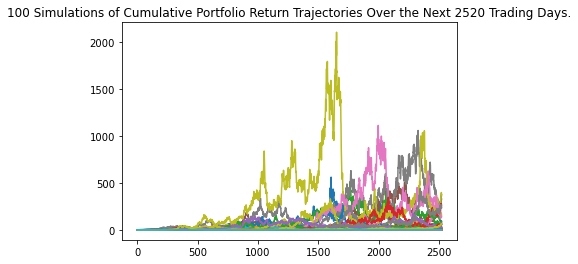

In [54]:
# Plot simulation outcomes
VIX_line_plot_10 = VIX_10_year_sim.plot_simulation()
# Save the plot
VIX_line_plot_10.get_figure().savefig("VIX_10_year_sim_plot.png", bbox_inches="tight")

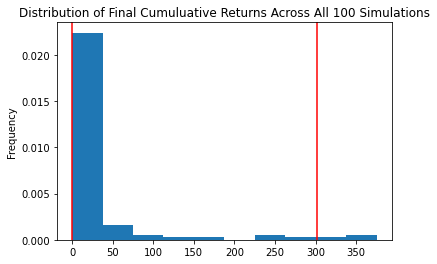

In [55]:
# Plot probability distribution and confidence intervals
VIX_dist_plot_10 = VIX_10_year_sim.plot_distribution()
# Save the plot
VIX_dist_plot_10.get_figure().savefig("VIX_10_year__dist_plot.png", bbox_inches="tight")